# Исследование продаж компьютерных игр

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

### Откройте файл с данными и изучите общую информацию.

Импорт библиотек `pandas`, `matplotlib` и `scipy`:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st

Чтение csv-файла и вывод первых 15 строк:

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.head(15)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Вывод информации о таблице методами `info()` и `describe()`. В некоторых столбцах пропущены значения и типы данных не соответствуют.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Построим гистограмму для каждого столбца:

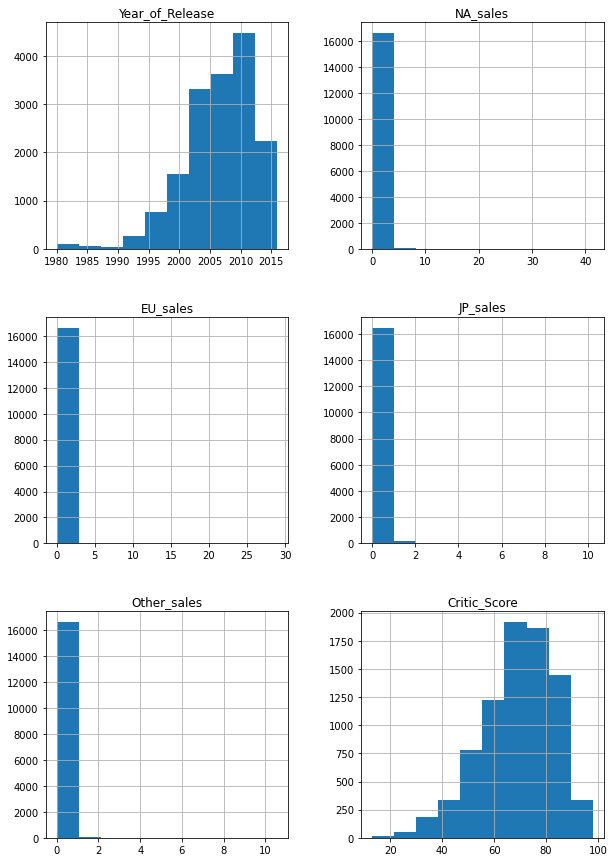

In [5]:
data.hist(figsize=(10, 15))
plt.show()

### Подготовьте данные.

#### Замените названия столбцов.

Приведем названия столбцов к нижнему регистру с помощью метода `rename()`:

In [6]:
data = data.rename(str.lower, axis='columns')

#### Преобразуйте данные в нужные типы.

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.7+ MB


Тип столбца `year_of_release` заменим с `float` на `int`:

In [69]:
data['year_of_release'] = data['year_of_release'].astype('Int64', errors='ignore')

Тип столбца `user_score` заменим с `object` на `float`, значения 'tbd' будут заменены на NaN:

In [9]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

В таблице два столбца с некорректными типами данных - `year_of_release` и `user_score`. В столбце `year_of_release` первоначальный тип данных - `float`, год не может быть нецелым числом. Также в столбце `user_score` первоначальный тип данных `object`, а верный тип данных для столбца - `float`.

#### Обработайте пропуски.

Определим в каких столбцах пропущены данные:

In [10]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

В столбцах с названием игры и жанра - `name` и `genre` по 2 пропущенных значения. Заменить эти значения на характерные не получится, поэтому удалим эти строки.

In [11]:
# check
(
    (data.isna().mean()*100)
    .sort_values(ascending=False)
    .to_frame()
    .rename(columns = {0:'percent_space'})
    .style.background_gradient('coolwarm').format("{:.1f}")
)

,percent_space
user_score,54.6
critic_score,51.3
rating,40.5
year_of_release,1.6
name,0.0
genre,0.0
platform,0.0
na_sales,0.0
eu_sales,0.0
jp_sales,0.0


In [12]:
data = data.dropna(subset=['name', 'genre'])

Пропуски в столбце `year_of_release` заполнять не будем, так как мы не можем восстановить их с достаточной точностью. При заполнении столбца `year_of_release` могла произойти техническая ошибка, и не все данные были подгружены.

Пропуски в столбце `rating` заменим на значение "WR" (Without Rating), т. е. игры без оценки. Пропуски в столбце `rating` можно объяснить тем, что некоторые компьютерные игры из датасета были выпущены до 1994 (год основания ESRB), этим играм рейтинг не был проставлен, или же игра ожидает оценки.

In [13]:
data['rating'] = data['rating'].fillna('WR')

Пропуски в столбцах `critic_score` и `user_score` заменим на медианное значение по каждому жанру из столбца `genre`. Пропуски в этих столбцах могли появиться по причине того, что игра вышла давно или же, наоборот, недавно, и оценки ей проставлены не были, также пропуски могут быть обусловлены технической ошибкой.

In [14]:
data['critic_score'] = data.groupby('genre')['critic_score'].apply(lambda x: x.fillna(x.median()))

В столбце `user_score` до замены типа данных были значения 'tbd' (аббревиатура с англиского - 'подлежит уточнению'), фактически это тоже пропуски, которые необходимо заменить.

In [15]:
data['user_score'] = data.groupby('genre')['user_score'].apply(lambda x: x.fillna(x.median()))

#### Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

Добавим новый столбец `total_sales`:

In [16]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

Выведем первые 15 строк обновленной таблицы:

In [17]:
data.head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,69.0,7.7,WR,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,74.0,7.8,WR,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,70.0,7.5,WR,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,73.0,7.4,WR,28.31


In [18]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  float64
 9   user_score       16713 non-null  float64
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.7+ MB


### Проведите исследовательский анализ данных.

#### Посмотрите, сколько игр выпускалось в разные годы.

Построим гистограмму для столбца `year_of_release`:

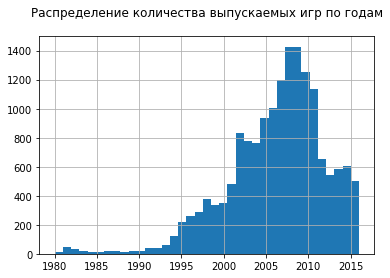

In [19]:
data['year_of_release'].hist(bins=37)
plt.title('Распределение количества выпускаемых игр по годам', pad = 20)
plt.show()

На гистограмме видно, что наибольшее количество игр выпускалось в 2008-2009 году. Мешьше всего игр выпускалось до 2000 года. После 2009 года количество выпускаемых игр идет на спад.

#### Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам.

Создадим сводную таблицу с наибольшими суммарными продажами игр по платформам и построим столбчатую диаграмму.

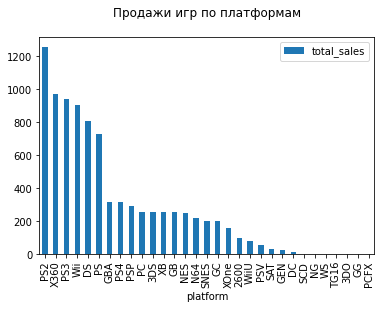

In [20]:
data.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
.sort_values('total_sales', ascending=False).plot.bar()
plt.title('Продажи игр по платформам', pad = 20)
plt.show()

Выберем топ-10 платформ по наибольшему количеству продаж.

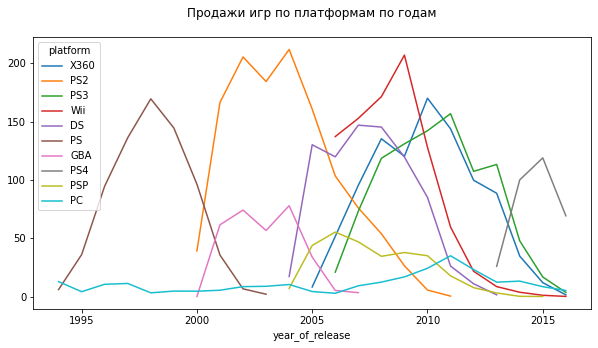

In [21]:
data.query('year_of_release > 1993').pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')\
[['X360', 'PS2', 'PS3', 'Wii', 'DS', 'PS', 'GBA', 'PS4', 'PSP', 'PC']].plot(figsize=(10,5))
plt.title('Продажи игр по платформам по годам', pad = 20)
plt.show()

На графике видно, что у каждой платформы есть пик продаж, кроме PC, после которого идет спад, и продажи игр на платформу прекращаются. Срок актуальности платформы 7 - 12 лет.

#### Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов.

Для последующего анализа возьмем период равный 3 годам, т. е. с 2014 по 2016 год. За этот период игр выпускалось меньше, чем за предыдущие 4 года, но и неактуальные на этот период платформы анализироваться не будут. Создадим новую таблицу `actual_data`.

In [22]:
actual_data = data.query('year_of_release >= 2014')

#### Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.


Создадим сводную таблицу за актуальный период с наибольшими суммарными продажами игр по платформам и построим столбчатую диаграмму.

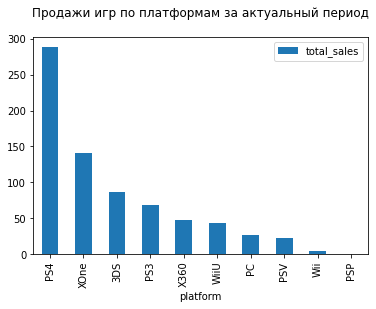

In [23]:
actual_data.pivot_table(index='platform', values='total_sales', aggfunc='sum')\
.sort_values('total_sales', ascending=False).plot.bar()
plt.title('Продажи игр по платформам за актуальный период', pad = 20)
plt.show()

Также построим график суммарных продаж игр по платформам.

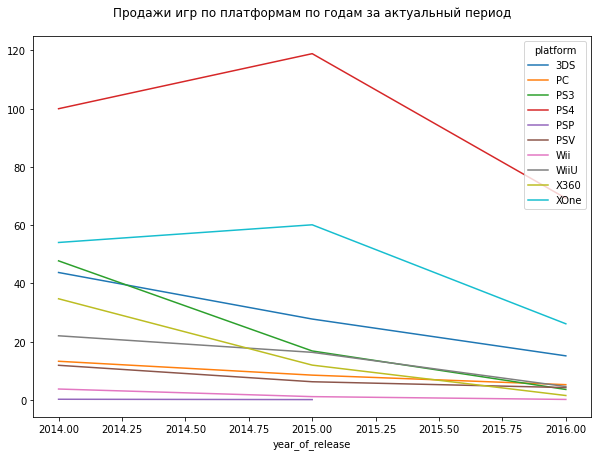

In [24]:
actual_data.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')\
.plot(figsize=(10, 7))
plt.title('Продажи игр по платформам по годам за актуальный период', pad = 20)
plt.show()

Наибольшее количество сумаррных продаж игр на платформах PS4 и XOne. В 2015 году прекратились продажи игр на PSP. В целом продажи на всех платформах падают.

Потенциально прибыльные платформы - PS4 и XOne, платформа PC - актуальна всегда, хотя и приносит меньше прибыли по сравнению с остальными платформами.

#### Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.


Построим диаграммы размаха для каждой платформы с выбросами и без. 

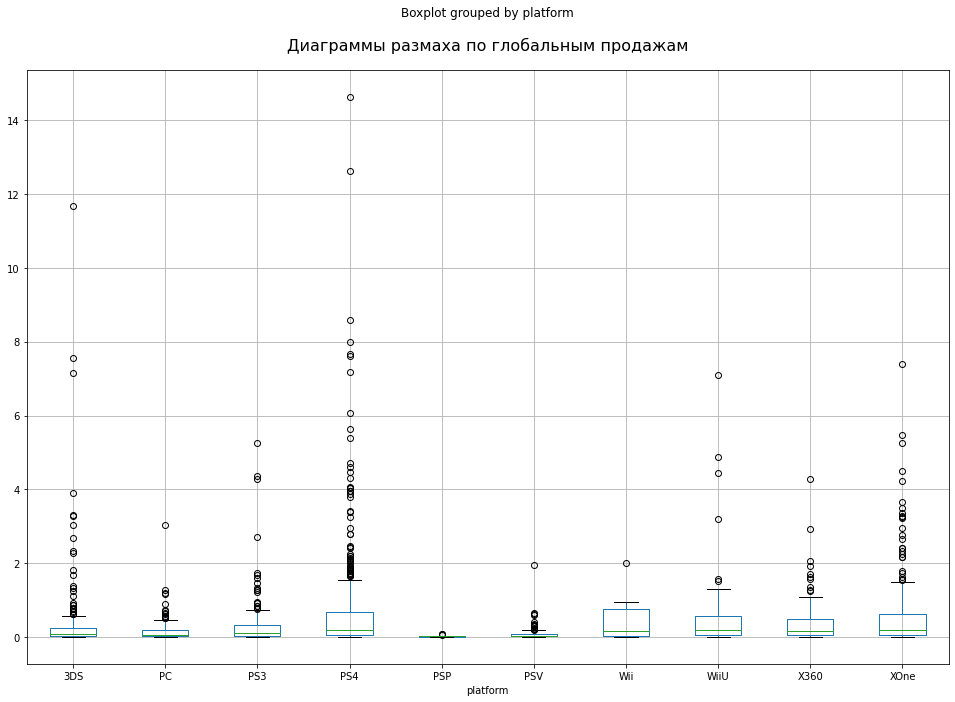

In [25]:
actual_data.boxplot(column = ['total_sales'], by='platform', figsize=(16, 11))
plt.title('Диаграммы размаха по глобальным продажам', pad = 20, fontsize=16)
plt.show()

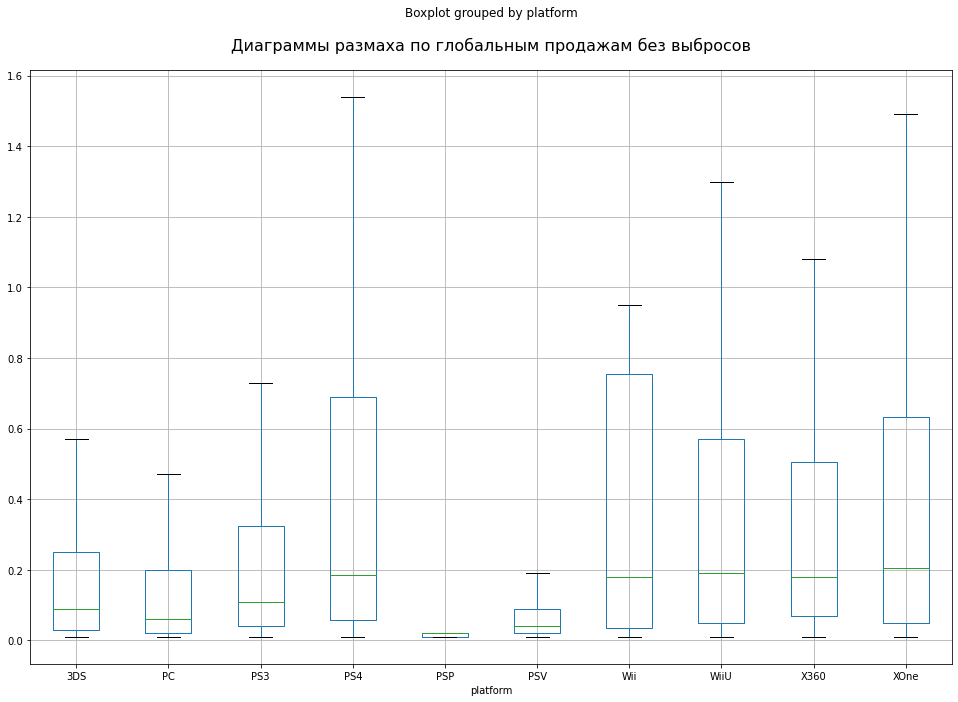

In [26]:
actual_data.boxplot(column = ['total_sales'], by='platform', figsize=(16, 11), showfliers=False)
plt.title('Диаграммы размаха по глобальным продажам без выбросов', pad = 20, fontsize=16)
plt.show()

На диаграммах видно, что по всем платформам есть выбивающиеся значения. Большего всего выбросов у платформ PS4, XOne и 3DS. Наибольшая медиана у платформ PS4 и XOne, наименьшая - PSP и PSV. Таким образом, самые прибыльные платформы - PS4, XOne, самые неприбыльные - PSP и PSV.

#### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.


Для анализа выберем платформу с самими большими суммарными продажами за актуальный период - PS4.

Диаграмма рассеяния и корреляция для зависимости продаж от отзывов пользователей:

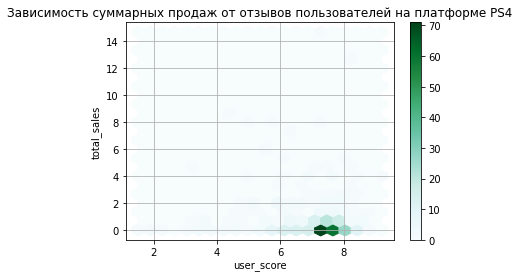

In [27]:
data_PS4 = actual_data.query('platform == "PS4"')
data_PS4.plot(x='user_score', y='total_sales', kind='hexbin', gridsize=20, sharex=False, grid=True)
plt.title('Зависимость суммарных продаж от отзывов пользователей на платформе PS4')
plt.show()

In [28]:
print(f"Коэффициент Пирсона: {data_PS4['user_score'].corr(data_PS4['total_sales']):.2}")

Коэффициент Пирсона: -0.067


По диаграмме и вычисленному коэффициенту, можно сделать вывод, что на суммарные продажи отзывы пользователей практически не влияют.

Диаграмма рассеяния и корреляция для зависимости продаж от отзывов критиков:

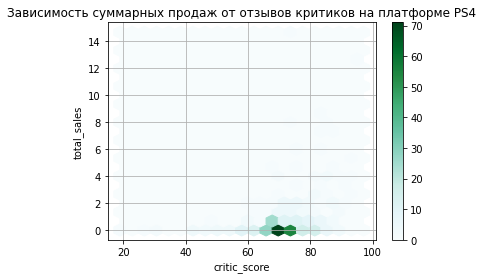

In [29]:
data_PS4.plot(x='critic_score', y='total_sales', kind='hexbin', gridsize=20, sharex=False, grid=True)
plt.title('Зависимость суммарных продаж от отзывов критиков на платформе PS4')
plt.show()

In [30]:
print(f"Коэффициент Пирсона: {data_PS4['critic_score'].corr(data_PS4['total_sales']):.2}")

Коэффициент Пирсона: 0.35


По диаграмме и вычисленному коэффициенту, можно сделать вывод, что суммарные продажи зависят от отзывов критиков, но не сильно.

#### Соотнесите выводы с продажами игр на других платформах.


Проанализируем зависмость суммарных продаж от отзывов пользователей и критиков на других платформах. 

Диаграмма рассеяния и корреляция для зависимости продаж от отзывов пользователей:

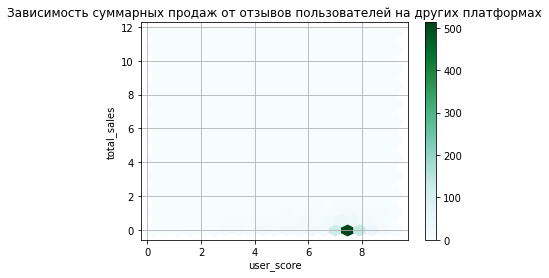

In [31]:
data_other = actual_data.query('platform != "PS4"')
data_other.plot(x='user_score', y='total_sales', kind='hexbin', gridsize=20, sharex=False, grid=True)
plt.title('Зависимость суммарных продаж от отзывов пользователей на других платформах')
plt.show()

In [32]:
print(f"Коэффициент Пирсона: {data_other['user_score'].corr(data_other['total_sales']):.2}")

Коэффициент Пирсона: -0.073


Так же, как и при анализе платформы PS3, по диаграмме и вычисленному коэффициенту, можно сделать вывод, что на суммарные продажи отзывы пользователей практически не влияют.

Диаграмма рассеяния и корреляция для зависимости продаж от отзывов критиков:

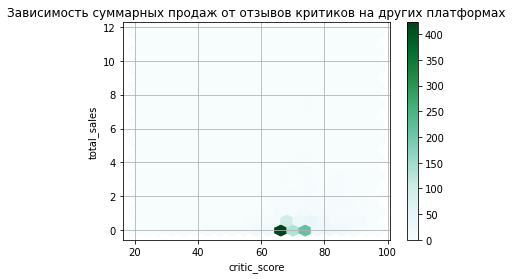

In [33]:
data_other.plot(x='critic_score', y='total_sales', kind='hexbin', gridsize=20, sharex=False, grid=True)
plt.title('Зависимость суммарных продаж от отзывов критиков на других платформах')
plt.show()

In [34]:
print(f"Коэффициент Пирсона: {data_other['critic_score'].corr(data_other['total_sales']):.2}")

Коэффициент Пирсона: 0.25


Так же, как и при анализе платформы PS4, по диаграмме и вычисленному коэффициенту, можно сделать вывод, что суммарные продажи зависят от отзывов критиков, но не сильно.

#### Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

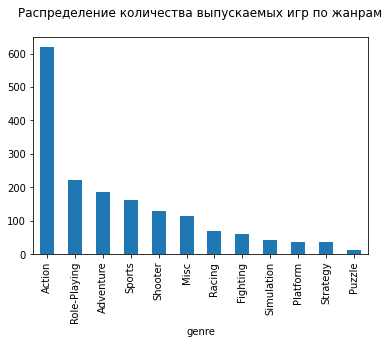

In [35]:
actual_data.value_counts('genre').plot.bar()
plt.title('Распределение количества выпускаемых игр по жанрам', pad = 20)
plt.show()

Большего всего игр выпускается жанра - Action, меньше всего - Puzzle. Рассмотрим, как распределяются жанры по суммарным продажам.

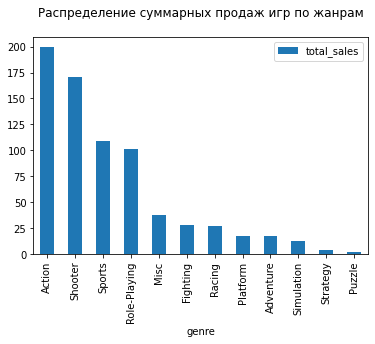

In [36]:
actual_data.pivot_table(index='genre', values='total_sales', aggfunc='sum').sort_values('total_sales', ascending=False).plot.bar()
plt.title('Распределение суммарных продаж игр по жанрам', pad = 20)
plt.show()

Так как игр жанра Action выпускается больше всего, суммарные продажи соответсвенного игр этого жанра больше. Жанр Puzzle также соответсвенно на последнем месте. На этом графике выделяются жанры Shooter и Adventure. По количеству выпускаемых игр - жанр Shooter на 5-ом месте, а по суммарным продажам на 2-ом. По количеству выпускаемых игр - жанр Adventure на 3-ом месте, а по суммарным продажам на 9-ом. 

Рассмотрим жанры на диграмме размаха.

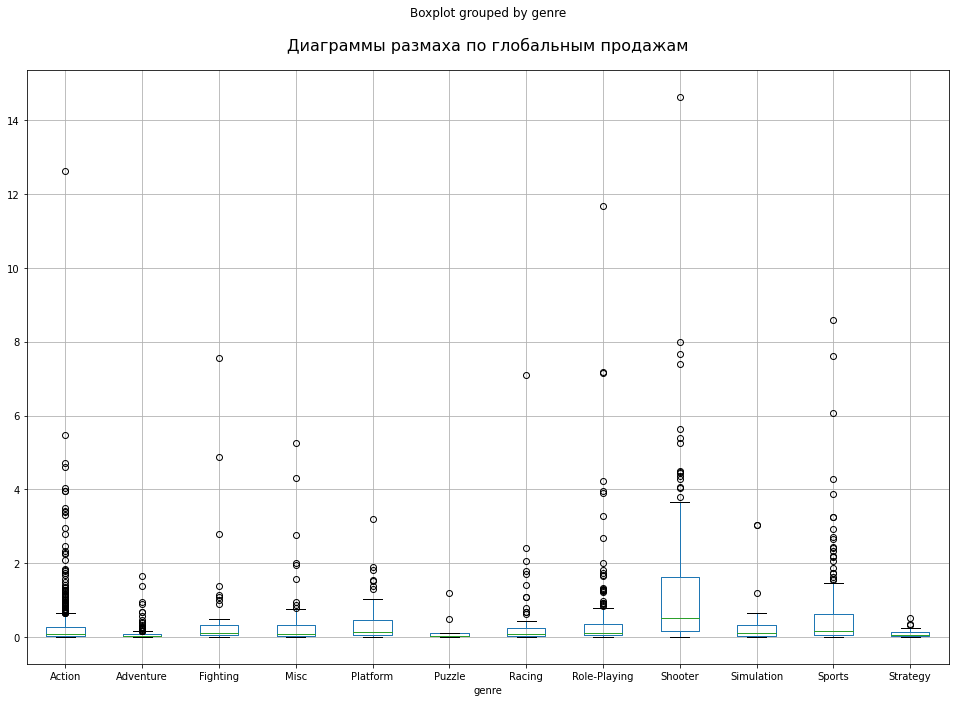

In [37]:
actual_data.boxplot(column = ['total_sales'], by='genre', figsize=(16, 11))
plt.title('Диаграммы размаха по глобальным продажам', pad = 20, fontsize=16)
plt.show()

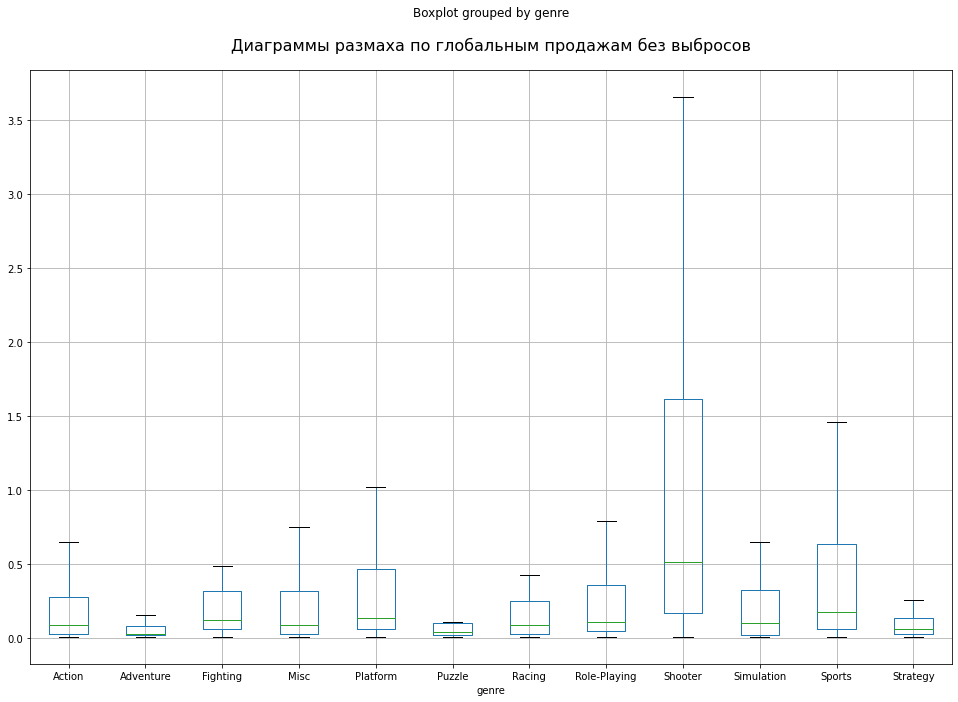

In [38]:
actual_data.boxplot(column = ['total_sales'], by='genre', figsize=(16, 11), showfliers=False)
plt.title('Диаграммы размаха по глобальным продажам без выбросов', pad = 20, fontsize=16)
plt.show()

Большего всего выбросов у жанра Action, меньше всего - у жанра Puzzle. Наибольшая медиана у жанра Shooter, наименьшая - у жанра Adventure. Таким образом, самые прибыльные жанры - Shooter и Sports, самые неприбыльные - Puzzle и Adventure.

### Составьте портрет пользователя каждого региона.

#### Самые популярные платформы (топ-5). Опишите различия в долях продаж.

Построим столбчатую диаграмму по продажам игр по платформам в каждом регионе.

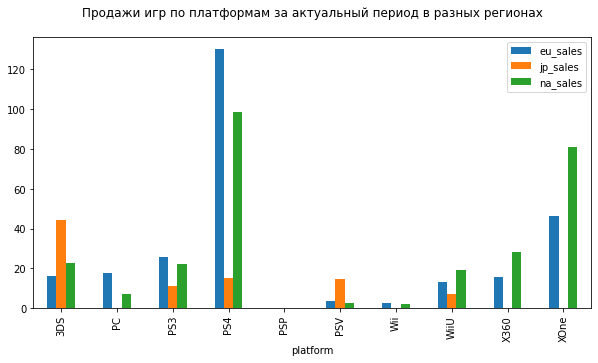

In [39]:
actual_data.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')\
.plot.bar(figsize=(10,5))
plt.title('Продажи игр по платформам за актуальный период в разных регионах', pad = 20)
plt.show()

На общем графике видно, что есть различия, особенно между Японией и Северной Америкой, Европой. Рассмотрим каждый регион отдельно.

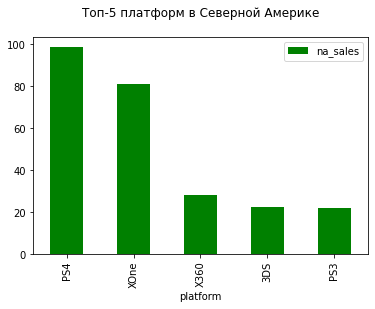

In [40]:
actual_data.pivot_table(index='platform', values='na_sales', aggfunc='sum')\
.sort_values('na_sales', ascending=False).head(5).plot.bar(color='green')
plt.title('Топ-5 платформ в Северной Америке', pad = 20)
plt.show()

Самая популярная платформа в Северной Америке PS4, далее XOne.

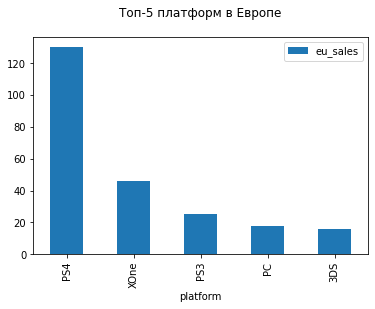

In [41]:
actual_data.pivot_table(index='platform', values='eu_sales', aggfunc='sum')\
.sort_values('eu_sales', ascending=False).head(5).plot.bar()
plt.title('Топ-5 платформ в Европе', pad = 20)
plt.show()

В Европе так же, как и в Северной Америке самые популярные платформы PS4 и XOne. В топ-5 популярных платформ оказался PC.

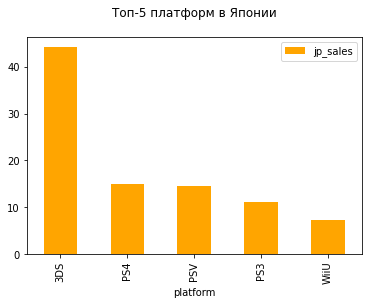

In [42]:
actual_data.pivot_table(index='platform', values='jp_sales', aggfunc='sum')\
.sort_values('jp_sales', ascending=False).head(5).plot.bar(color='orange')
plt.title('Топ-5 платформ в Японии', pad = 20)
plt.show()

Топ-5 платформ в Японии сильно различаются с Северной Америкой и Европой, во всех регионах популярнs только PS4 и PS3. В Японии пользователи предпочитают портативные платформы - 3DS, WiiU, PSV.

#### Самые популярные жанры (топ-5). Поясните разницу.

Построим столбчатую диаграмму по продажам игр по жанрам в каждом регионе.

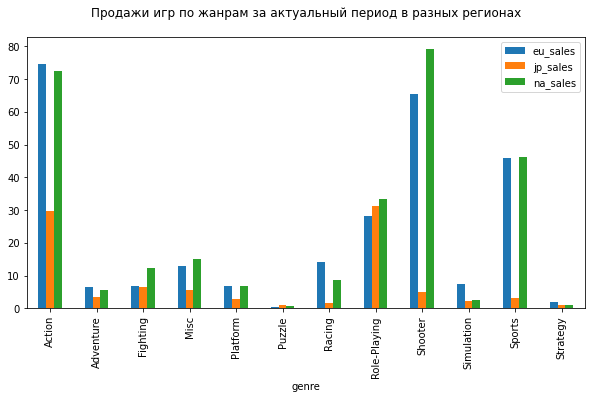

In [43]:
actual_data.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')\
.plot.bar(figsize=(10,5))
plt.title('Продажи игр по жанрам за актуальный период в разных регионах', pad = 20)
plt.show()

На общем графике видно, что есть небольшие различия в жанрах по регионам. Рассмотрим каждый регион отдельно.

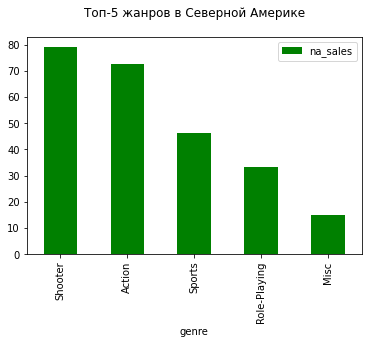

In [44]:
actual_data.pivot_table(index='genre', values='na_sales', aggfunc='sum')\
.sort_values('na_sales', ascending=False).head(5).plot.bar(color='green')
plt.title('Топ-5 жанров в Северной Америке', pad = 20)
plt.show()

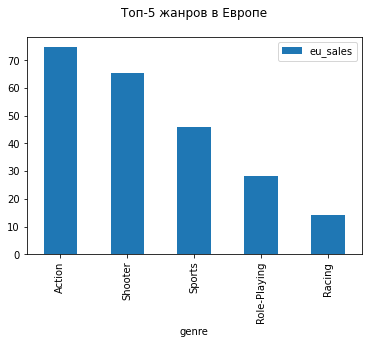

In [45]:
actual_data.pivot_table(index='genre', values='eu_sales', aggfunc='sum')\
.sort_values('eu_sales', ascending=False).head(5).plot.bar()
plt.title('Топ-5 жанров в Европе', pad = 20)
plt.show()

Топ-5 жанров в Северной Америке и Европе практически совпадают, различия только 5-ом жанре. В топ-5 Северной Америки входит жанр Misc, а в Европе - Racing.

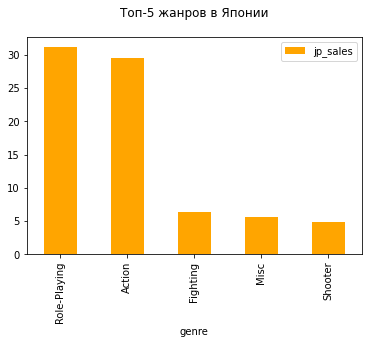

In [46]:
actual_data.pivot_table(index='genre', values='jp_sales', aggfunc='sum')\
.sort_values('jp_sales', ascending=False).head(5).plot.bar(color='orange')
plt.title('Топ-5 жанров в Японии', pad = 20)
plt.show()

В Японии, как и в других регионах, в топ-5 жанров Action, Shooter и Role-Playing. Также в топ-5 входят жанры Misc и Fighting. Самый популярный жанр - Role-Playing, жанр Action на 2-ом месте.

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

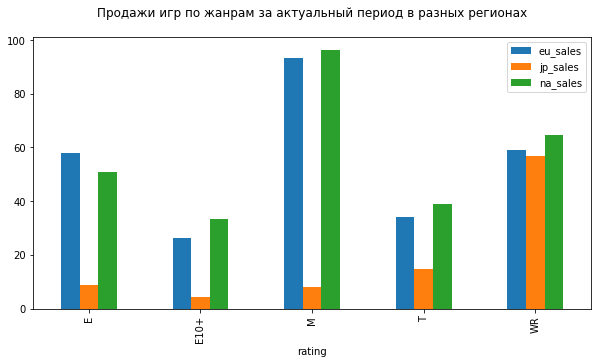

In [47]:
actual_data.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')\
.plot.bar(figsize=(10,5))
plt.title('Продажи игр по жанрам за актуальный период в разных регионах', pad = 20)
plt.show()

В целом на общем графике отличий между регионами нет. Рассмотрим каждый регион отдельно.

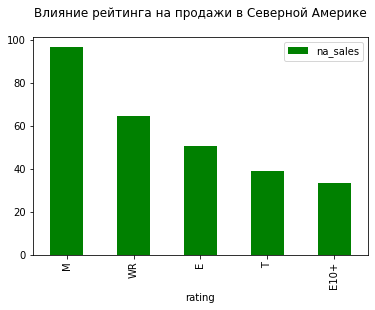

In [48]:
actual_data.pivot_table(index='rating', values='na_sales', aggfunc='sum')\
.sort_values('na_sales', ascending=False).plot.bar(color='green')
plt.title('Влияние рейтинга на продажи в Северной Америке', pad = 20)
plt.show()

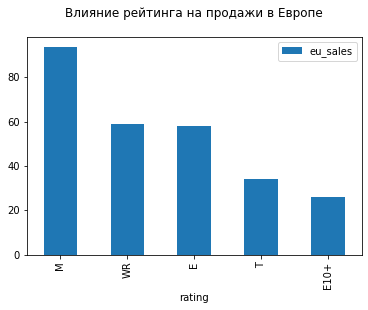

In [49]:
actual_data.pivot_table(index='rating', values='eu_sales', aggfunc='sum')\
.sort_values('eu_sales', ascending=False).plot.bar()
plt.title('Влияние рейтинга на продажи в Европе', pad = 20)
plt.show()

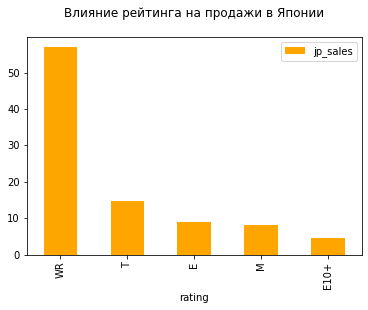

In [50]:
actual_data.pivot_table(index='rating', values='jp_sales', aggfunc='sum')\
.sort_values('jp_sales', ascending=False).plot.bar(color='orange')
plt.title('Влияние рейтинга на продажи в Японии', pad = 20)
plt.show()

Во всех регионах наименьшие продажи у игр с рейтингом E10+ (Для всех от 10 лет и старше). Довольно много продаж у игр без рейтинга, в Японии они на 1-ом месте, в Северной Америке и Европе - на 2-ом. В Северной Америке и Европе на 1-ом месте рейтинг M (Для взрослых), в Японии он на 4-ом месте. В топ-2 в Японии игры с рейтингом T (Подросткам), в Северной Америке и Европе он на 4-ом месте.

### Проверьте гипотезы.

Сформулируем нулевую и альтернативную гипотезы.

Нулевая гипотеза формулируется с использованием знака равенства, так и были сформулированы вышеуказанные гипотезы. Альтернативная гипотеза противоположна нулевой и формулируется со знаком неравенства в этих случаях.

Для проверки гипотез будем использовать st.ttest_ind - метод для проверки гипотезы о равенстве среднего двух генеральных совокупностей, также укажем параметр equal_var = False, т. к. выборки разного размера и их дисперсии не одинаковы.

Пороговое значение установим общепринятое - 0.05.

Уровень значимости, p-value — это суммарная вероятность того, что измеренное эмпирически значение окажется далеко от среднего. Если наблюдаемое на выборке значение попадает в эту зону, вероятность такого события при верной нулевой гипотезе признаётся слишком малым, значит, у нас есть основание отвергнуть нулевую гипотезу. Когда значение попадает в зону «Не отвергаем H₀», то
оснований отвергать нулевую гипотезу нет.

Проверка гипотезы: средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

```
H_0: Средние пользовательские рейтинги платформы Xbox One = cредние пользовательские рейтинги платформы PC
H_a: Средние пользовательские рейтинги платформы Xbox One ≠ cредние пользовательские рейтинги платформы PC
alpha = 0.05
```

In [51]:
sample_xone = actual_data.query('platform == "XOne"')['user_score']
sample_pc = actual_data.query('platform == "PC"')['user_score']
results = st.ttest_ind(sample_xone, sample_pc, equal_var=False)

alpha = .05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.05074473945849195
Не получилось отвергнуть нулевую гипотезу


# Оценка влияния заполнения оценок медианами на стат тест

In [52]:
import numpy as np

In [53]:
data_game = pd.read_csv('/datasets/games.csv')

In [54]:
data_game.columns = map(str.lower, data_game.columns)

In [55]:
data_game = data_game.dropna(subset = ['year_of_release', 'name', 'genre'])

In [56]:
data_game['user_score'] = data_game['user_score'].replace('tbd', np.nan).astype('float')

In [57]:
data_game['total_sales'] = data_game[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [58]:
xone_1 = data_game.query('platform == "XOne" and year_of_release >= 2014')['user_score'].dropna()
pc_1 = data_game.query('platform == "PC" and year_of_release >= 2014')['user_score'].dropna()
results = st.ttest_ind(xone_1, pc_1, equal_var=False)

alpha = .05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.11601398086668827
Не получилось отвергнуть нулевую гипотезу


In [59]:
# Приведены два датасета: сумма покупок, совершённых за месяц посетителями ...

sample_1 = [3071, 3636, 3454, 3151, 2185, 3259, 1727, 2263, 2015,
2582, 4815, 633, 3186, 887, 2028, 3589, 2564, 1422, 1785,
3180, 1770, 2716, 2546, 1848, 4644, 3134, 475, 2686,
1838, 3352]
sample_2 = [1211, 1228, 2157, 3699, 600, 1898, 1688, 1420, 5048, 3007,
509, 3777, 5583, 3949, 121, 1674, 4300, 1338, 3066,
3562, 1010, 2311, 462, 863, 2021, 528, 1849, 255,
1740, 2596]
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу
results = st.ttest_ind(
sample_1,
sample_2)
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:

    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.1912450522572209
Не получилось отвергнуть нулевую гипотезу


Проверка гипотезы: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные;

```
H_0: Средние пользовательские рейтинги жанра Action = средние пользовательские рейтинги жанр Sports
H_a: Средние пользовательские рейтинги жанра Action ≠ средние пользовательские рейтинги жанр Sports
alpha = 0.05
```

In [60]:
sample_action = actual_data.query('genre == "Action"')['user_score']
sample_sports = actual_data.query('genre == "Sports"')['user_score']
results = st.ttest_ind(sample_action, sample_sports, equal_var=False)

alpha = .05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 7.412639945317349e-17
Отвергаем нулевую гипотезу


### Общий вывод.

В результате исследования были выполнены следующие шаги: предобработка данных, исследовательский анализ данных, составлен портрет пользователя каждого региона и проверены гипотезы.

На этапе предобработки были переименованны столбцы, приведены в нижний регистр. Данные были преобразованы в нужные типы. В данных было выявлено множество пропусков столбцах. Большая часть пропусков была заменена характерным значением - медианой, в некоторых столбцах остались пропуски.

На этапе ислледовательского анализа было проанализированно количество выпускаемых игр и построено распределение продаж по годам. На основе этих данных была сделана выборка для дальнейшего анализа. Актуальный период равняется 3-м годам. Далее для актуальных данных были проанализированны продажи по платформам и выбраны потенциально прибыльные - PS4 и XOne. Для определения зависимости продаж от отзывов были построены диаграммы рассеяния и посчитаны коэффициенты. Отзывы пользователей практически не влияют на продажи, отзывы критиков влиют, но не сильно. Также было проанализированно распределение игр по жанрам, были выявлены наиболее прибыльные жанры - Shooter и Sports. 

При составлении портрета пользователя каждого региона были рассмотрены самые популярные платформы и жанры. Пользователи Японии по топ-5 платформ, жанров и рейтингов отличаются от пользователей Северной Америки и Европы.

Также были проверены две гипотезы средние пользовательские рейтинги платформ Xbox One и PC одинаковые и средние пользовательские рейтинги жанров Action и Sports разные. Были сформулированы нулевая и альтернативные гипотезы. В результате теста данные гипотезы отвергнуты не были.